In [166]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

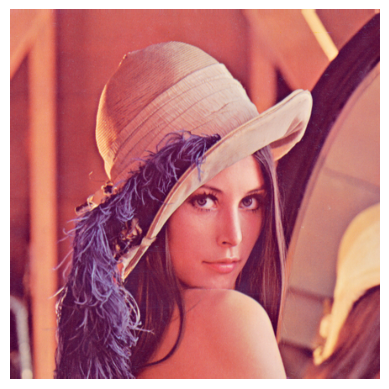

In [167]:
img = cv.imread('lena.png')
img = np.array(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.imshow(img)
plt.axis('off')
plt.show()

# a) Ручная коррекция


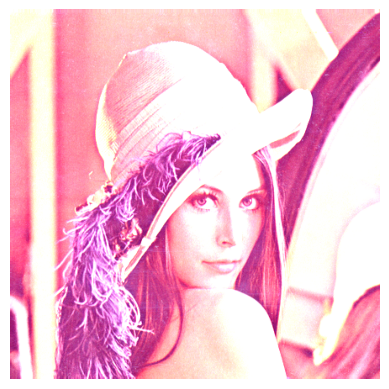

In [168]:
new_img = np.zeros(img.shape, img.dtype)
alpha = 1.0 # contrast
beta = 0    # brightness

alpha = float(input('* Enter the alpha value: '))
beta = int(input('* Enter the beta value: '))

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        new_img[x,y] = np.clip(alpha*img[x,y] + beta, 0, 255)

plt.imshow(new_img)
plt.axis('off')
plt.show()

# b) Гамма коррекция

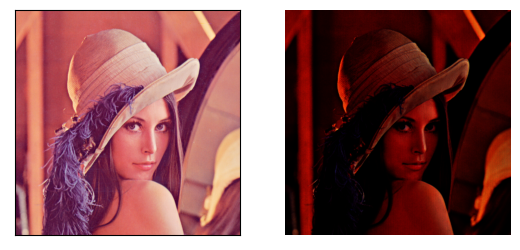

In [169]:
gamma_corrected = img.copy()
gamma = float(input('* Enter the gamma value: '))
look_up_table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)], dtype='uint8')
gamma_corrected = cv.LUT(gamma_corrected, look_up_table)
images = [img, gamma_corrected]
for i in range(2):
    plt.subplot(1, 2, i + 1), plt.imshow(images[i])
    plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

# c)Гистограмма

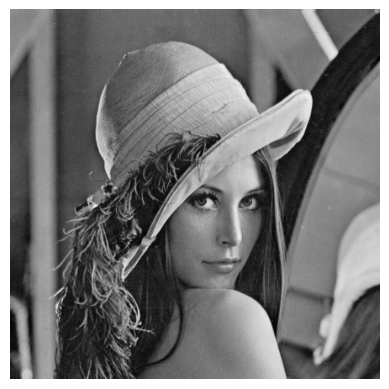

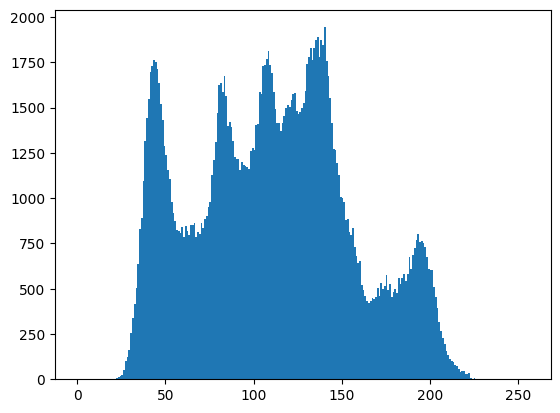

In [170]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# hist = cv.calcHist([gray_img],[0],None,[256], [0, 256])
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()
plt.hist(gray_img.ravel(), 256, [0,256])
plt.show()

# d) Эквализация гистограммы

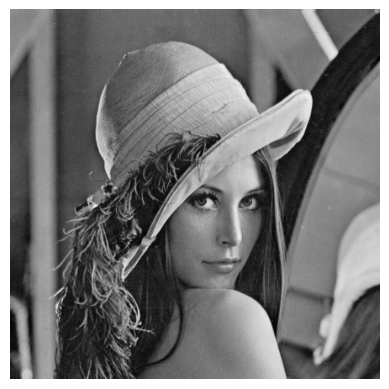

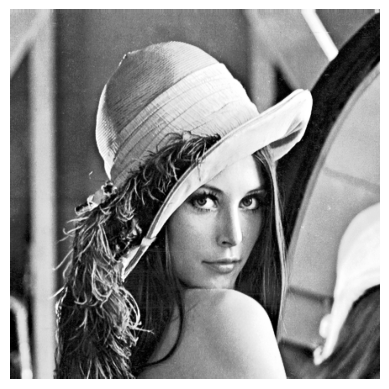

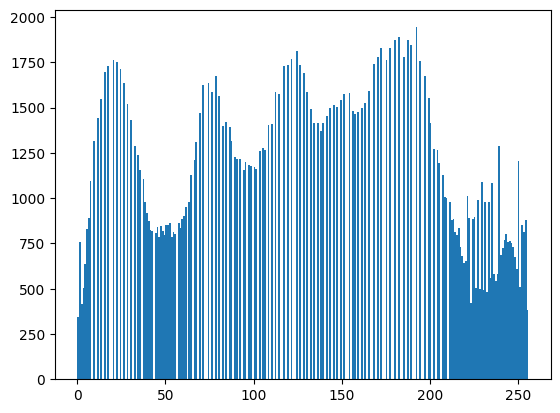

In [171]:
equalized = np.copy(gray_img)
equalized = cv.equalizeHist(equalized)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(equalized, cmap='gray')
plt.axis('off')
plt.show()
plt.hist(equalized.ravel(), 256, [0,256])
plt.show()